# 0 Introduction to RL

**什么是RL?**

> Reinforcement learning (RL) is an **interdisciplinary area** of **machine learning** and **optimal control** concerned with how an intelligent agent **ought to take actions** in a **dynamic environment** in order to **maximize the cumulative reward**. Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning. (Wikipedia)

简单来说，RL就是一个研究 **如何在和环境交互中最大化自己的利益，或者“reward”** 的学科。RL中重要的元素是**agent**和**environment**，二者形成一个闭环：
- agent的输入是environment的反馈，输出它的应对，一般称为**action**；
- environment接收agent的反应，并进行一个演化。演化结果给出新的 **状态(state)** 。此外，为了给予agent一个目标，环境还要给agent一个**reward**。

换句话说，agent在每一个state下面给出action，而环境根据这个action就会到达一个新的state。而agent的整体目标，如上所述，是 **最大化reward的时间和**。

![](./assets/0-1.png)

## 0.1 Life is a MDP

### MDP

在介绍RL的基本概念之前，我们首先要介绍MDP的概念。MDP是**Markov Decision Process**的缩写，是强化学习的基础。

一个MDP包括：
- 一个状态空间(state space) $S$
- 一个动作空间(action space) $A$
- 一个奖励函数(reward function) $r$
    - 具体地，对于一个state $s\in S$和一个action $a\in A$，这一函数给出一个实数 $r(s,a)$，代表着在state $s$下面采取action $a$获得的“奖励”。
- 一个状态转移函数(transition function) $p$
    - 具体地，对于一个state $s\in S$和一个action $a\in A$，这一函数给出一个概率分布$p(s'|s,a)$，代表着在state $s$下面采取action $a$之后，下一个state是$s'$的概率。


这里的“Markov”体现在哪里呢？我们可以设想一个agent在和环境逐渐地交互：
- agent初始时处于一个state $s_0$,这是环境给定的；
- agent根据$s_0$采取一个action $a_0$；
- 环境根据$s_0$和$a_0$给出一个reward $r_0$，并且给出下一个state $s_1$。此时，agent就处于state $s_1$；
- agent再根据$s_1$采取一个action $a_1$。不断由此往复……

可以看到，在这一过程中，只要第$t$轮的$s_t,a_t$给定了，环境就可以决定$s_{t+1}$，而不需要$s_0,a_0,s_1,\cdots,s_{t-1},a_{t-1}$这些信息！这就是Markov性质的体现。

那么，“Decision”又是指什么呢？可以看到，上面的描述只包含了环境的部分；而我们的agent的介入方式也很简单，就是对于一个state $s$，给出一个**政策** (policy)，也就是action的分布。我们可以把它记作$\pi(a|s)$。

> Q: 为什么政策只需要当前的state就可以做出决定呢？和历史一定无关吗？
>
> A: 这是也是因为我们Markov的假设。你说的这种情况叫做“Non-markovian agent”。虽然这更普遍，但很多经验表明，non-markovian的agent并不比我们这样的agent做的好很多。

### POMDP

POMDP是Partially Observed MDP的简称。这对应一个虽然略复杂，但更普适的问题陈述：环境并不一定向我们完全袒露心怀，而是只给我们一部分信息。这样的问题在实际中更为常见。比如说，在物理的控制问题中，我们获得一张快照时，就丧失了作为物理系统的state所必须的速度信息。

对于POMDP，我们的policy就不能再是state的函数了。我们后面介绍POMDP的问题的时候也会提到，有两种类型的policy:

- memoryless: $\pi(a_t|o_t)$
- history-dependent: $\pi(a_t|o_1,o_2,\cdots,o_t)$

对于前者，我们有一个形象的图来展示：

![](../lecture/notes/assets/2-1.png)

这里的箭头代表着依赖关系，比如$o_t$依赖于且仅依赖于$s_t$。这样的问题就更加复杂了，因为observation本身不是markovian的——$o_t$不仅依赖于$o_{t-1},a_{t-1}$，而且依赖于$o_{t-2},a_{t-2},\cdots,o_1,a_1$。

在接下来的讨论中，如果不加说明，我们都考虑fully observed的MDP。

### MDP Simulators

MDP是一个如此广泛的概念，以至于大部分生活中的问题，在合适地定义state后，都可以变成一个在MDP中最大化cumulative reward的问题。正因如此，**RL基本上就是研究求解MDP的学科**。

但是，在研究RL时，如果真的要和环境进行交互，可能会有很大的代价（想一想为什么？）为此，OpenAI 的 `gym` 包创造了许多模拟环境，供人们“刷分”，也就是把RL算法投入真正应用前先看一看大体上这一方法好不好。我们接下来来看一下gym的使用。

> gym就是一坨答辨。 ——某学长

gym以它的不稳定和不兼容著称，而其渲染部分则是更符合这一描述。因此，在下面的代码开始前，让我们：
- 安装[requirements.txt](./requirements.txt)内的包；
- 运行`bash install.sh`；
- 如果在下面的代码的运行中，你遇到和渲染相关的错误，请不要贸然相信GPT或copilot给你的命令，因为它们有可能会让你的图形界面崩溃，或者显卡驱动失效。建议在各种论坛网站上找一些解决方案。
- 最后，祈祷！

In [1]:
%matplotlib inline
"Gym, I cry out to You; make haste to me! Give output to my code when I cry out to You. Let my library be set before You as binaries, the lifting up of my hands as drivers for graphics." and 'Good luck!'

'Good luck!'

Initial observation: [ 0.0273956  -0.00611216  0.03585979  0.0197368 ]
Initial info: {}


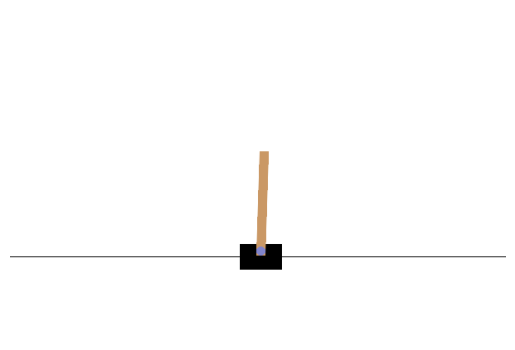

In [2]:
import gymnasium as gym
from utils import show_image
# Create the CartPole environment with 'rgb_array' mode
env = gym.make('CartPole-v1', render_mode='rgb_array')
# Reset the environment
observation,info = env.reset(seed=42)
print('Initial observation:',observation)
print('Initial info:',info)
# Render the environment and display the image
image = env.render()
show_image(image)

如果你成功看到了上面的输出和图片，那么恭喜你，你看到了环境`env`在初始化时的state $s_0$。根据gym的[官方文档](https://gymnasium.farama.org/environments/classic_control/cart_pole/)，这四个参数的含义如下：
- Cart Position
- Cart Velocity
- Pole Angle
- Pole Angular Velocity

上面的结果是决定性的，因为我们手动设置了`seed`为42。接下来，让我们再看看action是什么：

In [3]:
env.action_space.seed(42)
env.observation_space.seed(42)
'action space',[env.action_space.sample() for _ in range(10)]

('action space',
 [np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0)])

根据官方文档，0代表向左推一下车，而1代表向右推一下。那么，假设对于初始的状态，我们连续地向右推，会变成什么样？

In [4]:
from utils import show_video
import numpy as np
frames = []
for t in range(100):
    image = env.render()
    frames.append(image)

    action = np.int64(1) # always take the "push right" action.
    next_obs, reward, done, truncated, info = env.step(action) # 'step' is the function that gives the transition.
    observation = next_obs
    print('time stamp',t,'reward:',reward)
    if done or truncated:
        print('Stopped at timestamp',t,'due to','done' if done else 'truncated')
        break

show_video(frames)

time stamp 0 reward: 1.0
time stamp 1 reward: 1.0
time stamp 2 reward: 1.0
time stamp 3 reward: 1.0
time stamp 4 reward: 1.0
time stamp 5 reward: 1.0
time stamp 6 reward: 1.0
time stamp 7 reward: 1.0
time stamp 8 reward: 1.0
time stamp 9 reward: 1.0
Stopped at timestamp 9 due to done


很直观——如果我们一直推这一个车，杆就会向左倒下。此时，因为杆和竖直方向的夹角达到了某个临界值，`env`自动判断为游戏失败而结束。这就是`done`为`True`的原因。

同时，我们也可以看到`reward`的数值——对于每一个存活下来的一步，reward都是1。也就是说，我们的目的就是活得越长越好。

最后，让我们建立一个简单的agent，对这一任务作出一个难度上的基础感受。我们的`TrivialAgent`的思路很简单——如果杆偏左并且角速度向左，那么我们就往左推车；如果杆偏右并且角速度向右，那么我们就往右推车。最后，对于其他情况，因为这取决于未知的物理参数，我们不妨随机来选取action。这十分粗暴，但不妨让我们就看看它能做得怎样。

In [5]:
class TrivialAgent:

    def __init__(self,action_space):
        self.action_space = action_space
    
    def get_action(self,state):
        _,_,theta,omg = state
        if theta < 0 and omg < 0:
            return 0
        if theta > 0 and omg > 0:
            return 1
        return self.action_space.sample()

In [6]:
agent = TrivialAgent(env.action_space)
NUM_ROLLOUTS = 10
results = []
for rollout in range(NUM_ROLLOUTS):
    cum_reward = 0
    observation,_ = env.reset()
    for t in range(1000):
        action = agent.get_action(observation) # let our agent to decide what to do
        next_obs, reward, done, truncated, info = env.step(action)
        observation = next_obs
        cum_reward += reward
        if done or truncated:
            print('Terminate at time',t,'due to', 'done' if done else 'truncated')
            results.append(cum_reward)
            break
print('Average cumulative reward',sum(results)/len(results))
print('results:',results)

Terminate at time 499 due to truncated
Terminate at time 499 due to truncated
Terminate at time 347 due to done
Terminate at time 412 due to done
Terminate at time 395 due to done
Terminate at time 482 due to done
Terminate at time 499 due to truncated
Terminate at time 249 due to done
Terminate at time 499 due to truncated
Terminate at time 310 due to done
Average cumulative reward 420.1
results: [500.0, 500.0, 348.0, 413.0, 396.0, 483.0, 500.0, 250.0, 500.0, 311.0]


利用`TrivialAgent`，我们解锁了一个新“技能”——`truncated`！这个情况是因为环境具有一个有限的“**horizon**”，也就是到达这个时间后就会自动结束，类似于“游戏胜利”。这样，总的cumulative reward才有上限。我们看到，就这样一个愚蠢的agent就已经可以做到84%的最优解了！因此，这一任务确实是简单的。

我们还可以看到，不同组数据之间reward（即存活时间）可以相差很远——最大值是最小值的2倍！的确，你开始认识到RL了——一个接着一个的state迭代使得整个体系具有巨大的方差。我们后面会更加具体地讨论这一点。

最后，让我们欣赏一下我们的第一个“agent”的舞蹈，来结束这一小节吧！

In [7]:
frames = []
[env.reset() for _ in range(2)] # a tiny trick here :)
observation,_ = env.reset()
for t in range(1000):
    image = env.render()
    frames.append(image)

    action = agent.get_action(observation)
    next_obs, reward, done, truncated, info = env.step(action)
    observation = next_obs
    if done or truncated:
        print('Stopped at timestamp',t,'due to','done' if done else 'truncated')
        break

show_video(frames)

Stopped at timestamp 499 due to truncated


## 0.2 MDP Solvers

有一种非常启发性的讨论RL问题的方法：我们从简单到难，逐渐引出RL的各种方法。现在，就让我们来这样做。

### A Known MDP

注意前面的问题中（从`gym`的演示中也可以看到），环境的transition function和reward function都是完全未知的。但考虑到我们对MDP问题还没有太多的了解，我们不妨 **放松一步，观察一下如果这些都是已知的，我们作为一个人该如何找到最好的策略呢？**

这可能说起来略微抽象，但我们可以考虑如下的具体问题：在一个（比如说）$4\times 4$的方格表里有一个特殊的格子，到达那里时游戏结束并且获得奖励，而其他地方的奖励都是0。transition也很简单：在每一个格子(state)处，可以选择向一个方向走(action)，然后就走到了下一个state。（如果在终点那么不管如何走都到达end state）。

注意根据我们的假设，这个MDP是已知的，也就是我们知道那个特殊的格子在哪里。此时，如果不是agent而是人来解决这一问题，你该如何解决？很明显，你可以给出一个决定性的最优策略：假设我们在那个格子旁边的时候，我们就走过去；进一步，如果在再旁边一点的8个格子处，我们就走到前一次的4个格子……这样，递归地，如果确定了距离格子的Manhattan distance (定义为 $\text{MHT}((x_1,y_1),(x_2,y_2))=|x_1-x_2|+|y_1-y_2|$)为$n$的所有点的策略，那么距离格子为$n+1$的所有点的策略也就确定了。因此，我们可以给出一个完整的策略。给定一个具体的 $4\times 4$ 表格和那个特殊的格子，我们就可以给出这个最优策略。一个例子如下所示。

|$\rightarrow$ | $\rightarrow$ | $\downarrow$ | $\leftarrow$|
|--|--|--|--|
| $\rightarrow$| $\to$ | $\star$ | $\leftarrow$ |
|$\rightarrow$ | $\rightarrow$ | $\uparrow$ | $\leftarrow$ |
| $\rightarrow$| $\uparrow$ | $\uparrow$ | $\leftarrow$|

解决了这一问题，我们接下来试着把问题稍微一般化。假设transition并非像上面一样是确定的，而是随机的：比如，在一个格子处